In [ ]:
import torch
import torchvision
import torchaudio

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 14513, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 14513 (delta 19), reused 24 (delta 14), pack-reused 14477
Receiving objects: 100% (14513/14513), 13.66 MiB | 24.07 MiB/s, done.
Resolving deltas: 100% (10000/10000), done.


In [ ]:
!cd yolov5 

In [ ]:
pip install -r /content/yolov5/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 182 kB 5.1 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |████████████████████████████████| 1.6 MB 59.5 MB/s 


In [ ]:
import torch
from matplotlib import pyplot as plt
import numpy as np 
import cv2

In [ ]:
# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-12-14 Python-3.8.16 torch-1.13.0+cu116 CPU



  0%|          | 0.00/14.1M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
img = 'https://ultralytics.com/images/zidane.jpg'

In [ ]:
results=model(img)
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 318.1ms pre-process, 337.3ms inference, 28.5ms NMS per image at shape (1, 3, 384, 640)


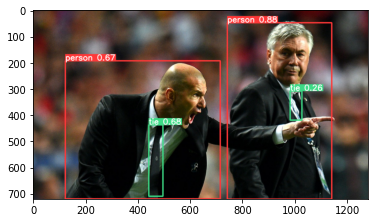

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
results.xyxy

[tensor([[7.42975e+02, 4.83957e+01, 1.14184e+03, 7.20000e+02, 8.81052e-01, 0.00000e+00],
         [4.42008e+02, 4.37522e+02, 4.96654e+02, 7.09974e+02, 6.75214e-01, 2.70000e+01],
         [1.23024e+02, 1.93287e+02, 7.15662e+02, 7.19724e+02, 6.65813e-01, 0.00000e+00],
         [9.82803e+02, 3.08417e+02, 1.02737e+03, 4.19987e+02, 2.60076e-01, 2.70000e+01]])]

In [ ]:
np.array(results.render()).shape

(1, 720, 1280, 3)

In [ ]:
np.squeeze(results.render()).shape

(720, 1280, 3)

In [ ]:
img = 'https://www.gannett-cdn.com/-mm-/9902e24b3ce22452871a78d74d7f00970fb66eca/c=0-0-533-401/local/-/media/2016/08/28/Westchester/Westchester/636079772228261612-traffic-peter-carr.jpg?width=2560'

In [ ]:
results=model(img)
results.print()

image 1/1: 1926x2560 23 cars, 4 trucks
Speed: 310.2ms pre-process, 417.9ms inference, 3.7ms NMS per image at shape (1, 3, 512, 640)


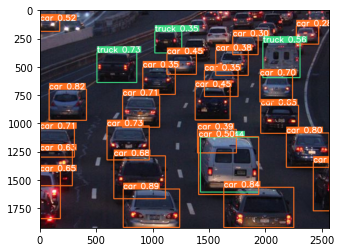

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLOV5s', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLOV5s', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
import uuid   # Unique identifier
import os
import time

In [ ]:
#/content/yolov5/data/images

In [ ]:
IMAGES_PATH = os.path.join('data','images')
labels = ['awake','drowsy']
number_imgs=20

In [ ]:
cap = cv2.VideoCapture(0)
for label in labels:
  print('Collecting images for {}'.format(label))
  time.sleep(5)
  for img_num in range(number_imgs):
    print('Collecting images for {}, image number {}'.format(label,img_num))
    ret,frame=cap.read()
    imgname=os.path.join(IMAGES_PATH,label+'.'+str(uuid.uuid1())+'.jpg')
    cv2.imshow(imgname,frame)
    cv2.imshow('Image Collection',frame)
    time.sleep(2)
    if cv2.waitKey(10) & 0xFF == ord('q'):
      break
cap.release()
cv2.destroyAllWindows()


DisabledFunctionError: ignored

In [ ]:
labels[0]+'.'+str(uuid.uuid1())+'.jpg'

'awake.598b1b14-7bd6-11ed-a2a8-0242ac1c000c.jpg'

In [ ]:
IMAGES_PATH+'/'+labels[0]+'.'+str(uuid.uuid1())+'.jpg'

'data/images/awake.7a6d4fe6-7bd6-11ed-a2a8-0242ac1c000c.jpg'

In [ ]:
os.path.join(IMAGES_PATH,labels[0]+'.'+str(uuid.uuid1())+'.jpg')

'data/images/awake.999d6220-7bd6-11ed-a2a8-0242ac1c000c.jpg'

In [ ]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...
remote: Enumerating objects: 2097, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 2097 (delta 0), reused 4 (delta 0), pack-reused 2090
Receiving objects: 100% (2097/2097), 237.14 MiB | 44.34 MiB/s, done.
Resolving deltas: 100% (1242/1242), done.


In [ ]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.4 MB 4.8 MB/s 
     |████████████████████████████████| 7.1 MB 48.9 MB/s 
     |████████████████████████████████| 361 kB 60.2 MB/s 
     |████████████████████████████████| 59.9 MB 1.2 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.9.1
    Uninstalling lxml-4.9.1:
      Successfully uninstalled lxml-4.9.1
/bin/bash: line 0: cd: labelImg: No such file or directory


In [ ]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp15/weights/last.pt', force_reload=True)